## Общая схема квазиньютоновских методов

```python
def QuasiNewtonMethod(f, x0, epsilon, **kwargs):
    
    x = x0
    
    H = H_0 #обратный гессиан в начальной точке
    
    while True:
        
        h = -H.dot(grad_f(x))
        
        if StopCriterion(x, f, h, **kwargs) < epsilon:
            
            break
            
        alpha = SelectStepSize(x, h, f, **kwargs)
            
        x = x + alpha * h
            
        H = UpdateH(H, f(x), grad_f(x))
            
    return x
```

## DFP (Davidon-Fletcher-Powell)

$$
B_{k+1} = (I - \rho_k y_k s^{\top}_k)B_k(I - \rho_k s_ky^{\top}_k) + \rho_k y_k y^{\top}_k,
$$

где $\rho_k = \dfrac{1}{y^{\top}_k s_k}$,

или с помощью формулы Шермана-Морисона-Вудбери

$$
B^{-1}_{k+1} = H_{k+1} = H_k - \dfrac{H_ky_k y_k^{\top}H_k}{y^{\top}_kH_ky_k} + \dfrac{s_ks^{\top}_k}{y^{\top}_ks_k}
$$


### Вывод

Общая идея квазиньютоновских методов: 

вместо полного пересчёта гессиана на каждой итерации обновлять 

текущую его аппроксимацию с помощью легко вычислимого 

преобразования

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from time import time
import sympy as sp
import numpy as np
import math as mt
import numpy.linalg as la
from scipy.misc import derivative

size = 200 #размерность пространства
epsilon = 1e-6 #точность решения

def f(x):
    return (mt.exp(x) - x) / 10

def function(y):
    global size
    funct = 0
    for i in range(0, size):
        funct = funct + (i + 1) * f(y[i])
    return funct

def distance(y, z):
    global size
    subdistance  = 0
    for i in range(0, size):
        subdistance = subdistance + (y[i] - z[i])*(y[i] - z[i])
    distance = mt.sqrt(subdistance)
    return distance


def DFP(f, function):
    c_1 = 1e-4
    end_time = 0
    start_time = 0
    num_it = 0
    global size
    global epsilon
    gradient = np.ones(size) 
    gradient_nxt = np.zeros(size)
    gessian = np.zeros((size, size))
    x = np.ones(size) #начальное приближение

    #задаём начальное приближение H_0 как обратный гессиан в начальной точке
    start_time = time()
    for i in range(0, size):
        gessian[i, i] = (i + 1) * derivative(f, x[i], dx=1e-6, n = 2)
            
    H = la.inv(gessian)
    #print(H.shape)
    H1 = np.eye(size)
    #print (H.shape)
    
    while True:  
        
        #начальный градиент
        for i in range(0, size):
            gradient[i] = (i + 1) * derivative(f, x[i], dx=1e-6)
        
        alpha = 0.5 # постоянный шаг(можно менять)
        h = -alpha* H.dot(gradient)
        
        if(distance(gradient, np.zeros(size)) <= epsilon):
            break
        
        x = x + h

        #конечный градиент
        for i in range(0, size):
            gradient_nxt[i] = (i + 1) * derivative(f, x[i], dx=1e-6, n = 1)

        d_y = gradient_nxt - gradient

        H = H + np.dot(h.reshape(size, 1), h.reshape(1, size)) / np.dot(h, d_y) - np.dot((H.dot(d_y)).reshape(size, 1), (H.dot(d_y)).reshape(1, size)) / np.dot(H.dot(d_y), d_y) 
        num_it = num_it + 1
        
    end_time = time()
    
    return(end_time - start_time, num_it)

a = np.zeros(2)
a = DFP(f, function)

Text(0.5, 1.0, 'График зависимости числа итераций от обратной точности')

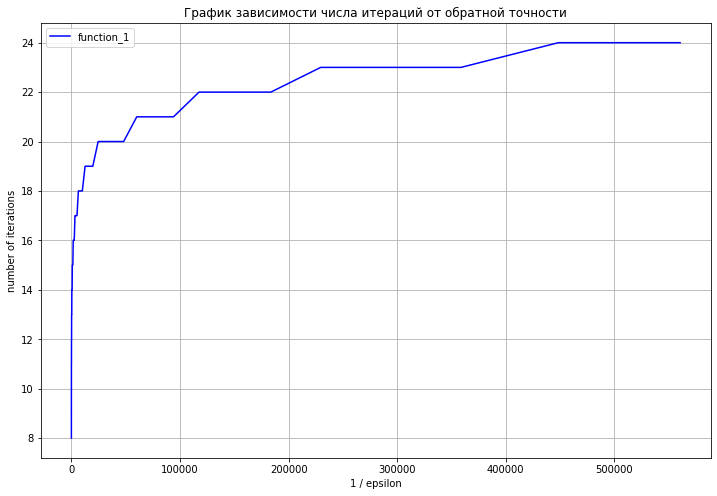

In [2]:
size = 20
epsilon = 0.1
iterations = 50
e1 = np.zeros(iterations)

tk1 = np.zeros((2, iterations))

for j in range(0, iterations):
    
    tk1[:, j] = DFP(f, function)
    e1[j] = 1 / epsilon
    epsilon = epsilon * 0.8
    
    
plt.figure(figsize = (12,8))
plt.plot(e1, tk1[1, :], c = 'blue', label = 'function_1')
plt.legend() 
plt.grid() 
plt.xlabel('1 / epsilon') 
plt.ylabel('number of iterations')
plt.title('График зависимости числа итераций от обратной точности')


Text(0.5, 1.0, 'График зависимости времени от обратной точности')

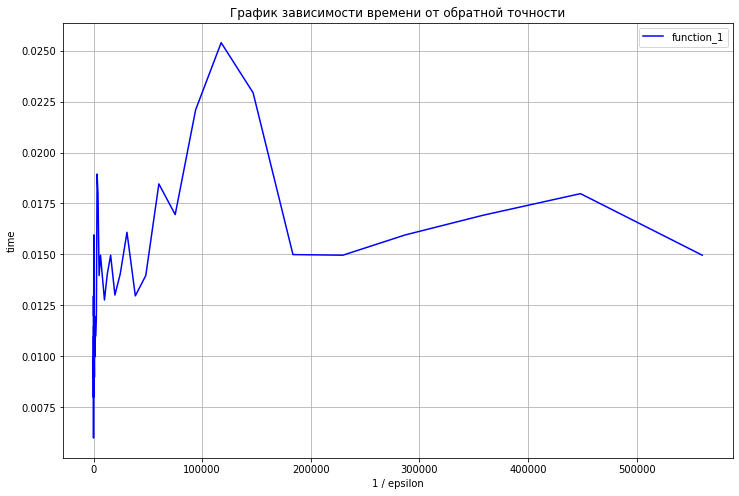

In [3]:
plt.figure(figsize = (12,8))
plt.plot(e1, tk1[0, :], c = 'blue', label = 'function_1')
plt.legend() 
plt.grid() 
plt.xlabel('1 / epsilon') 
plt.ylabel('time')
plt.title('График зависимости времени от обратной точности')

Text(0.5, 1.0, 'График зависимости числа итераций от логорифма обратной точности')

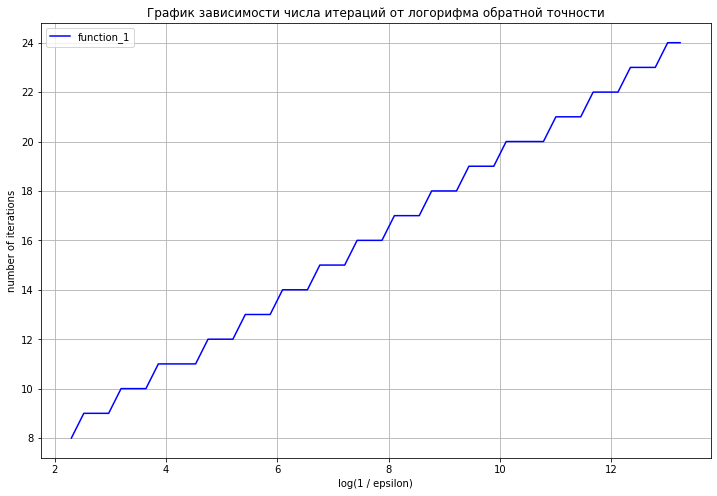

In [4]:
size = 20
epsilon = 1e-1
iterations = 50

e1 = np.zeros(iterations)
tk1 = np.zeros((2, iterations))

for j in range(0, iterations):
    
    tk1[:, j] = DFP(f, function)
    e1[j] = mt.log(1 / epsilon)
    epsilon = epsilon * 0.8


plt.figure(figsize = (12,8))
plt.plot(e1, tk1[1, :], c = 'blue', label = 'function_1')
plt.legend() 
plt.grid() 
plt.xlabel('log(1 / epsilon)') 
plt.ylabel('number of iterations')
plt.title('График зависимости числа итераций от логорифма обратной точности')

Text(0.5, 1.0, 'График зависимости числа итераций от размерности пространства')

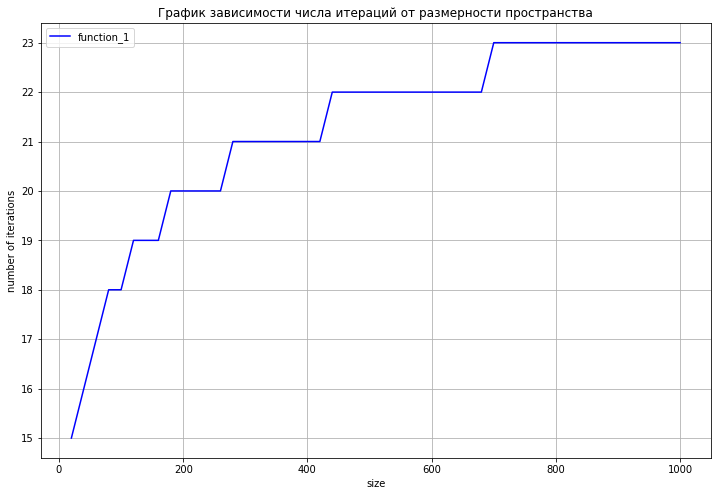

In [5]:
j = 0
size_0 = 20
size = size_0 
iterations = 50
epsilon = 1e-3
tk1 = np.zeros((2, iterations))

while size < size_0 * (iterations + 1):
    tk1[:, j] = DFP(f, function)
    size = size + size_0
    j = j + 1
    
plt.figure(figsize = (12,8))
axixx = np.arange(size_0, size_0 * (iterations + 1), size_0)
plt.plot(axixx, tk1[1, :], c = 'blue', label = 'function_1')
plt.legend() 
plt.grid() 
plt.xlabel('size') 
plt.ylabel('number of iterations')
plt.title('График зависимости числа итераций от размерности пространства')